In [1]:
import pandas as pd
import matplotlib.pyplot as plt


% matplotlib inline

In [2]:
dau = pd.read_csv("section3-dau.csv")
dpu = pd.read_csv("section3-dpu.csv")

In [4]:
dau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139112 entries, 0 to 139111
Data columns (total 3 columns):
log_date    139112 non-null object
app_name    139112 non-null object
user_id     139112 non-null int64
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
dpu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 883
Data columns (total 4 columns):
log_date    884 non-null object
app_name    884 non-null object
user_id     884 non-null int64
payment     884 non-null int64
dtypes: int64(2), object(2)
memory usage: 34.5+ KB


In [6]:
dau.head()

,log_date,app_name,user_id
0,2013-06-01,game-01,116
1,2013-06-01,game-01,13491
2,2013-06-01,game-01,7006
3,2013-06-01,game-01,117
4,2013-06-01,game-01,13492


In [7]:
dpu.head()

,log_date,app_name,user_id,payment
0,2013-06-01,game-01,351,1333
1,2013-06-01,game-01,12796,81
2,2013-06-01,game-01,364,571
3,2013-06-01,game-01,13212,648
4,2013-06-01,game-01,13212,1142


In [8]:
dau.describe()

,user_id
count,139112.000000
mean,14452.288882
std,7577.993324
min,1.000000
25%,8992.000000
50%,14645.000000
75%,20235.000000
max,29330.000000


In [9]:
dpu.describe()

,user_id,payment
count,884.000000,884.000000
mean,9741.416290,491.864253
std,9214.556223,500.019241
min,3.000000,0.000000
25%,307.000000,81.000000
50%,8745.000000,324.000000
75%,17539.000000,571.000000
max,29154.000000,2571.000000


In [10]:
dau.log_date.unique()

array(['2013-06-01', '2013-06-02', '2013-06-03', '2013-06-04',
       '2013-06-05', '2013-06-06', '2013-06-07', '2013-06-08',
       '2013-06-09', '2013-06-10', '2013-06-11', '2013-06-12',
       '2013-06-13', '2013-06-14', '2013-06-15', '2013-06-16',
       '2013-06-17', '2013-06-18', '2013-06-19', '2013-06-20',
       '2013-06-21', '2013-06-22', '2013-06-23', '2013-06-24',
       '2013-06-25', '2013-06-26', '2013-06-27', '2013-06-28',
       '2013-06-29', '2013-06-30', '2013-07-01', '2013-07-02',
       '2013-07-03', '2013-07-04', '2013-07-05', '2013-07-06',
       '2013-07-07', '2013-07-08', '2013-07-09', '2013-07-10',
       '2013-07-11', '2013-07-12', '2013-07-13', '2013-07-14',
       '2013-07-15', '2013-07-16', '2013-07-17', '2013-07-18',
       '2013-07-19', '2013-07-20', '2013-07-21', '2013-07-22',
       '2013-07-23', '2013-07-24', '2013-07-25', '2013-07-26',
       '2013-07-27', '2013-07-28', '2013-07-29', '2013-07-30', '2013-07-31'], dtype=object)

In [17]:
#dau = pd.read_csv("section3-dau.csv",index_col="log_date",parse_dates="Date")
dau = pd.read_csv("section3-dau.csv")

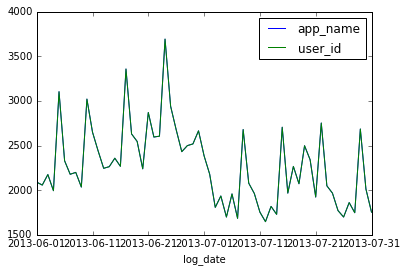

In [22]:
dau.groupby("log_date").count().plot()

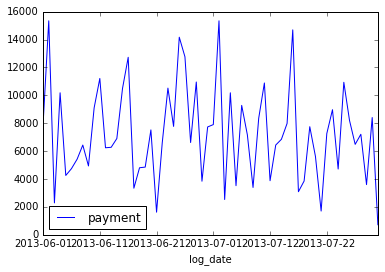

In [26]:
dpu.ix[:,["log_date","payment"]].groupby("log_date").sum().plot()

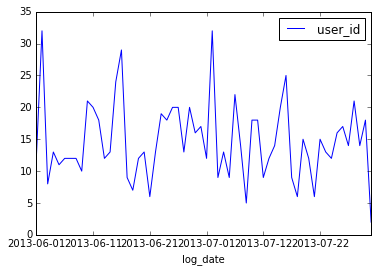

In [27]:
dpu.ix[:,["log_date","user_id"]].groupby("log_date").count().plot()

In [28]:
dau_ag = dau.groupby("log_date").count()

In [30]:
dau_ag.describe()

,app_name,user_id
count,61.000000,61.000000
mean,2280.524590,2280.524590
std,438.205264,438.205264
min,1648.000000,1648.000000
25%,1964.000000,1964.000000
50%,2240.000000,2240.000000
75%,2596.000000,2596.000000
max,3693.000000,3693.000000


In [31]:
dpu_agg1 = dpu.ix[:,["log_date","payment"]].groupby("log_date").sum()

In [32]:
dpu_agg2 = dpu.ix[:,["log_date","user_id"]].groupby("log_date").count()

In [44]:
dpu_agg = pd.concat([dpu_agg1,dpu_agg2],axis=1)

In [45]:
dpu_agg.head()

,payment,user_id
log_date,,
2013-06-01,7907,12
2013-06-02,15347,32
2013-06-03,2294,8
2013-06-04,10187,13
2013-06-05,4261,11


In [48]:
dpu_agg.columns=["payment_sum","user_cnt"]

In [53]:
ud = pd.concat([dau_ag,dpu_agg],axis=1)

In [54]:
ud.head()

,app_name,user_id,payment_sum,user_cnt
2013-06-01,2091,2091,7907,12
2013-06-02,2058,2058,15347,32
2013-06-03,2176,2176,2294,8
2013-06-04,1995,1995,10187,13
2013-06-05,3104,3104,4261,11


In [56]:
del ud["app_name"]

In [58]:
ud.head()

,user_id,payment_sum,user_cnt
2013-06-01,2091,7907,12
2013-06-02,2058,15347,32
2013-06-03,2176,2294,8
2013-06-04,1995,10187,13
2013-06-05,3104,4261,11


In [59]:
ud.columns = ["user_cnt","payment_sum","payment_cnt"]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b8912d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11bb96b90>], dtype=object)

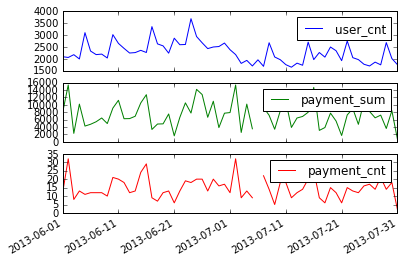

In [62]:
ud.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b7eaa50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11ccfbc90>], dtype=object)

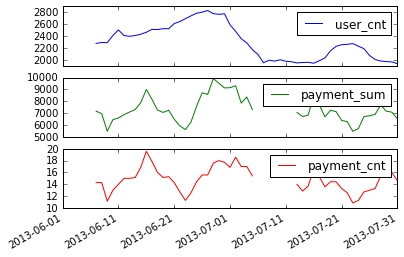

In [71]:
pd.rolling_mean(ud,7).plot(subplots  = True)

In [72]:
ud.payment_sum.corr(ud.payment_cnt)

0.8674602012769298

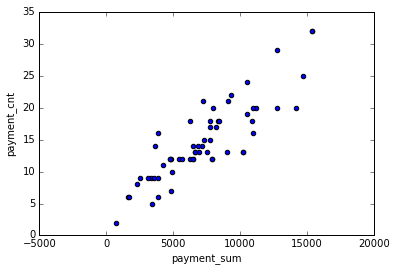

In [76]:
plt.scatter(ud.payment_sum,ud.payment_cnt)
plt.xlabel("payment_sum")
plt.ylabel("payment_cnt")

In [79]:
ud["date"] = ud.index

In [80]:
ud.head()

,user_cnt,payment_sum,payment_cnt,date
2013-06-01,2091,7907,12,2013-06-01
2013-06-02,2058,15347,32,2013-06-02
2013-06-03,2176,2294,8,2013-06-03
2013-06-04,1995,10187,13,2013-06-04
2013-06-05,3104,4261,11,2013-06-05


In [87]:
ud["month"] = ud.date.apply(lambda x :x[5:7])

In [88]:
ud.head()

,user_cnt,payment_sum,payment_cnt,date,month
2013-06-01,2091,7907,12,2013-06-01,06
2013-06-02,2058,15347,32,2013-06-02,06
2013-06-03,2176,2294,8,2013-06-03,06
2013-06-04,1995,10187,13,2013-06-04,06
2013-06-05,3104,4261,11,2013-06-05,06


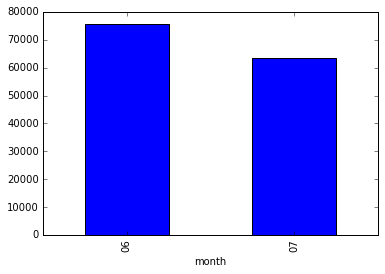

In [90]:
ud.groupby("month").sum().user_cnt.plot(kind = "bar")

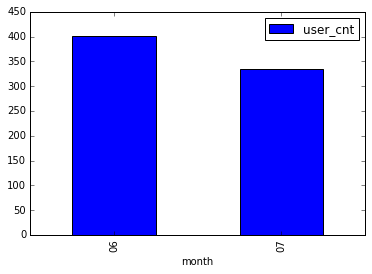

In [109]:
import numpy as np
ud.ix[:,["month","user_cnt"]].groupby("month").std().plot(kind="bar")

ValueError: No group keys passed!

In [12]:
dau.head()

,app_name,user_id
log_date,,
2013-06-01,game-01,116
2013-06-01,game-01,13491
2013-06-01,game-01,7006
2013-06-01,game-01,117
2013-06-01,game-01,13492


In [16]:
dau.groupby().sum()

TypeError: You have to supply one of 'by' and 'level'